In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from classifier import LinearClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["target"] = df["target"].replace({0: -1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.089109
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.997670
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,-1.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
np.unique(df['target'].to_numpy(), return_counts=True)

(array([-1,  1]), array([138, 165]))

In [6]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [7]:
sc = MinMaxScaler()
columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal'
]
df[columns] = sc.fit_transform(df[columns])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [8]:
X = df.drop(["target"], axis=1).to_numpy()
y = df["target"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242, 1), (61, 13), (61, 1))

In [9]:
def plot_loss_history(clf):
    plt.plot(clf.loss_history)
    plt.title('Loss')
    plt.show()


def plot_quality_history(clf):
    plt.plot(clf.quality_history)
    plt.title('Quality Functional')
    plt.show()


In [10]:
def multistart(n: int = 20):
    best_acc, best_weights = 0, None
    
    for i in range(n):
        classifier = LinearClassifier(X_train.shape[1])
        classifier.init_weights()
        classifier.fit(X_train, y_train,
                       n_iter=1000,
                       lr=0.001,
                       lam=0.01,
                       reg=0.5,
                       momentum=True,
                       gamma=0.9,
                       optimize_lr=False,
                       use_margins=False)
        y_res = classifier.predict(X_test)
        acc = accuracy_score(y_test, y_res)
        if acc >= best_acc:
            best_acc = acc
            best_weights = classifier.w

    return best_weights    


In [11]:
common_params = dict(
    n_iter=1_000,
    lr=0.001,
    lam=0.01,
    reg=0.5,
    gamma=0.9,
)

classifiers_to_test = [
    dict(
        title='Классификатор с регуляризацией и моментами Нестерова',
        w=lambda: None,
        momentum=True,
        optimize_lr=False,
        use_margins=False,
        **common_params,
    ),
    dict(
        title='Классификатор с отступами градиента',
        w=lambda: None,
        momentum=True,
        optimize_lr=False,
        use_margins=True,
        **common_params,
    ),
    dict(
        title='Классификатор с рандомным семплированием',
        w=lambda: None,
        momentum=False,
        optimize_lr=False,
        use_margins=False,
        **common_params,
    ),
    dict(
        title='Классификатор с весами через корреляцию',
        w=lambda: np.array([
            (y_train.T @ X_train[:, i]) / (X_train[:, i].T @ X_train[:, i])
            for i in range(X.shape[1])
        ]).T,
        momentum=False,
        optimize_lr=False,
        use_margins=False,
        **common_params,
    ),
    dict(
        title='Классификатор с весами через мультистарт',
        w=lambda: multistart(20),
        momentum=False,
        optimize_lr=False,
        use_margins=False,
        **common_params,
    ),
]

КЛАССИФИКАТОР С РЕГУЛЯРИЗАЦИЕЙ И МОМЕНТАМИ НЕСТЕРОВА


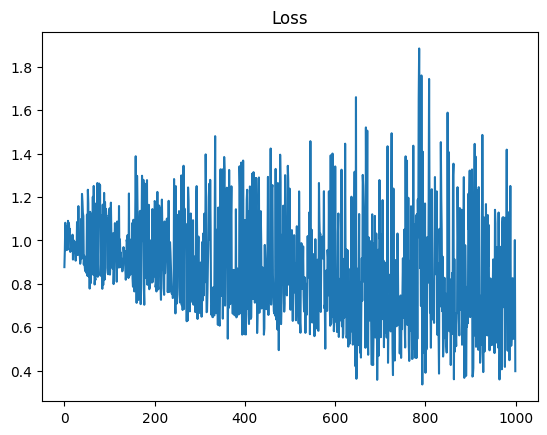

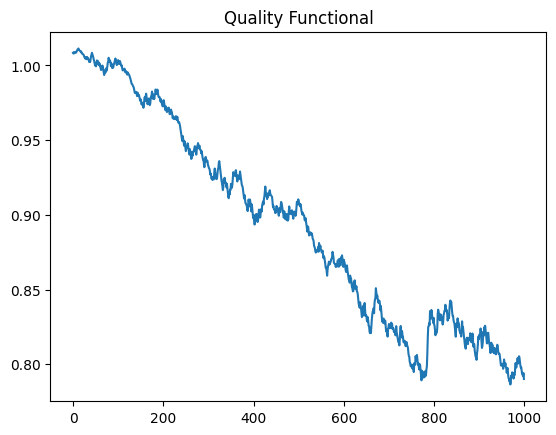

              precision    recall  f1-score   support

          -1       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61




КЛАССИФИКАТОР С ОТСТУПАМИ ГРАДИЕНТА


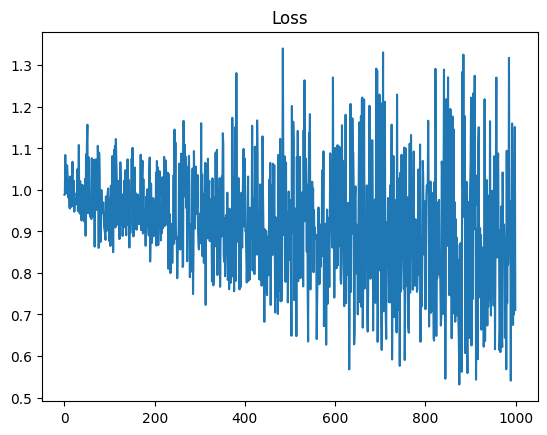

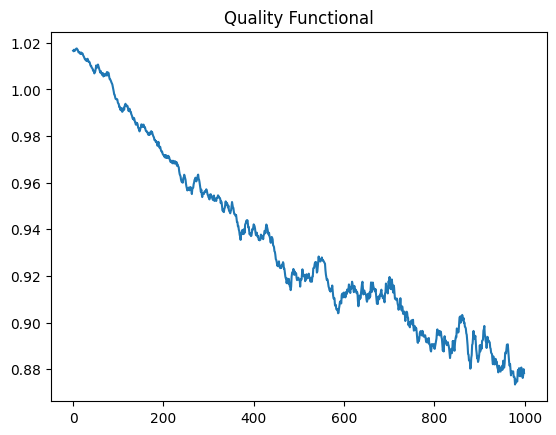

              precision    recall  f1-score   support

          -1       0.95      0.67      0.78        30
           1       0.75      0.97      0.85        31

    accuracy                           0.82        61
   macro avg       0.85      0.82      0.81        61
weighted avg       0.85      0.82      0.82        61




КЛАССИФИКАТОР С РАНДОМНЫМ СЕМПЛИРОВАНИЕМ


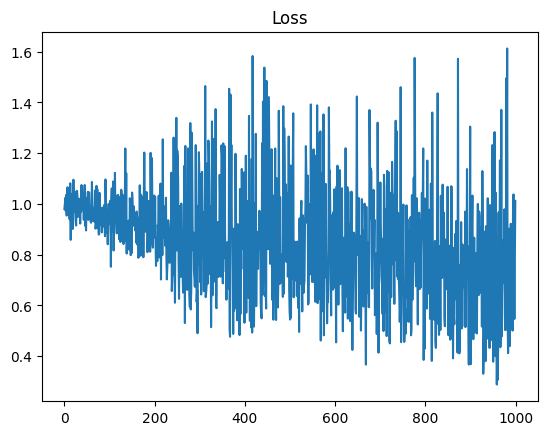

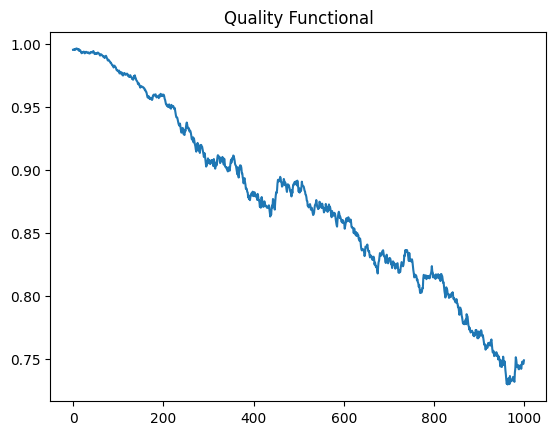

              precision    recall  f1-score   support

          -1       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61




КЛАССИФИКАТОР С ВЕСАМИ ЧЕРЕЗ КОРРЕЛЯЦИЮ


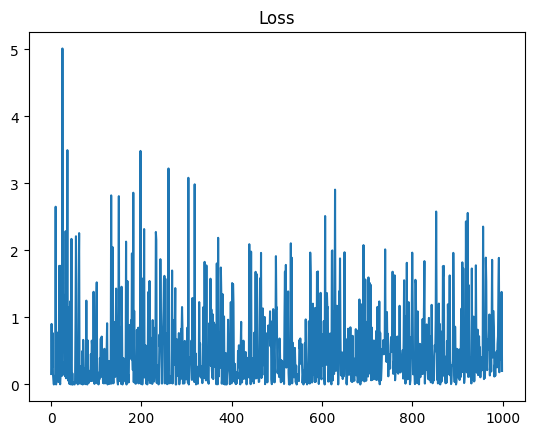

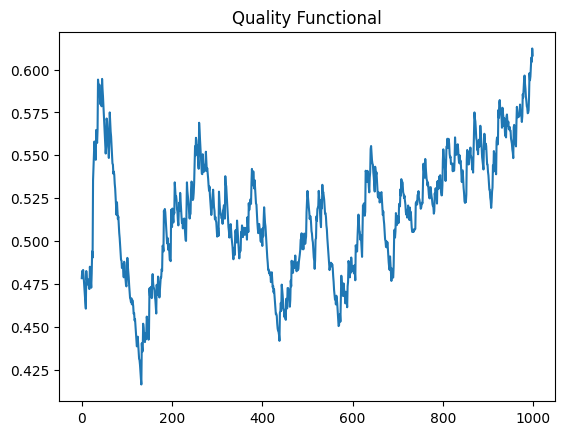

              precision    recall  f1-score   support

          -1       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61




КЛАССИФИКАТОР С ВЕСАМИ ЧЕРЕЗ МУЛЬТИСТАРТ


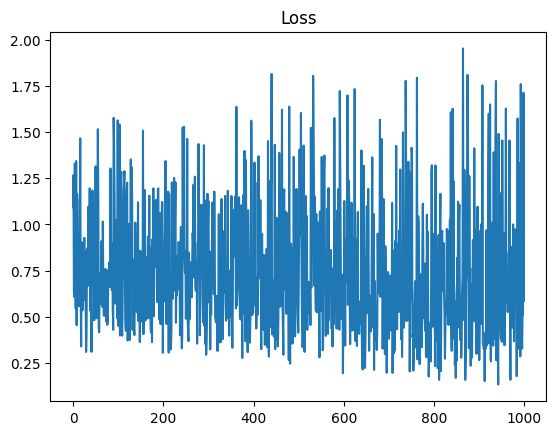

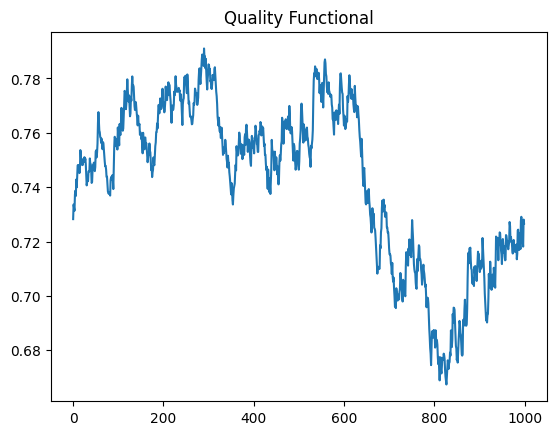

              precision    recall  f1-score   support

          -1       0.95      0.67      0.78        30
           1       0.75      0.97      0.85        31

    accuracy                           0.82        61
   macro avg       0.85      0.82      0.81        61
weighted avg       0.85      0.82      0.82        61




In [12]:
for clf_params in classifiers_to_test:
    title = clf_params.pop('title')
    w_fun = clf_params.pop('w')
    print(title.upper())
    
    clf = LinearClassifier(X.shape[1])
    clf.init_weights(w_fun())
    clf.fit(X_train, y_train, **clf_params)
    
    plot_loss_history(clf)
    plot_quality_history(clf)
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('\n\n')

In [13]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.77      0.78        30
           1       0.78      0.81      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


/Users/wignorbo/PycharmProjects/itmo_ml_algorithms/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
